# **Exploratory Data Analysis**
Let's take a look at the cleaned up data file prepared from the webscraped data from Glassdoor.

In [1]:
#import appropriate libraries
#!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#load the .csv saved in the cleanup notebook into a dataframe
file = r"C:\Users\Tineash\Projects\Glassdoor_webscraper\Data\DA_data_cleaned.csv" #copy the file path between the double quotes
df = pd.read_csv(file)
df

,Job Title,Salary Minimum,Salary Maximum,Salary Average,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Average Hourly Rate,Converted Salary,City,State,Company Age (years),Title Grouping,Seniority Level
0,IT-Data Analyst,45.0,82.0,61021.0,3.9,Federated Mutual Insurance Company,"Owatonna, MN",1001 to 5000 Employees,1904.0,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),0,61021,Owatonna,MN,118.0,analyst,na
1,Research and Data Analyst,51.0,91.0,67848.0,4.1,Association of American Medical Colleges,"Washington, DC",501 to 1000 Employees,1876.0,Nonprofit Organization,Health Care Services & Hospitals,Healthcare,$100 to $500 million (USD),0,67848,Washington,DC,146.0,analyst,na
2,Jr. Data Analyst,34.0,36.0,35.0,4.9,Spartan Capital Group LLC,Remote,1 to 50 Employees,2018.0,Company - Private,Business Consulting,Management & Consulting,$1 to $5 million (USD),1,72800,Remote,Remote,4.0,analyst,junior
3,Data Analyst + Apprentice (Entry-Level),35.0,45.0,40000.0,3.3,New Apprenticeship,"Raleigh, NC",1 to 50 Employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,0,40000,Raleigh,NC,NaN,analyst,na
4,Data Analyst,90.0,110.0,100000.0,4.6,Store Space Self Storage,"Greenwood Village, CO",201 to 500 Employees,2017.0,Company - Private,Real Estate,Real Estate,Unknown / Non-Applicable,0,100000,Greenwood Village,CO,5.0,analyst,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Data Analyst,90.0,110.0,100000.0,4.6,Store Space Self Storage,"Greenwood Village, CO",201 to 500 Employees,2017.0,Company - Private,Real Estate,Real Estate,Unknown / Non-Applicable,0,100000,Greenwood Village,CO,5.0,analyst,na
626,Data Modelling Analyst,40.0,85.0,58299.0,3.9,Aurora Energy Research Limited,"Austin, TX",201 to 500 Employees,2013.0,Company - Private,Energy & Utilities,"Energy, Mining & Utilities",Unknown / Non-Applicable,0,58299,Austin,TX,9.0,analyst,na
627,Data Analyst + Apprentice (Entry-Level),35.0,45.0,40000.0,3.3,New Apprenticeship,"Raleigh, NC",1 to 50 Employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,0,40000,Raleigh,NC,NaN,analyst,na
628,Data Analyst,97.0,135.0,116000.0,3.6,KEYENCE,"Itasca, IL",5001 to 10000 Employees,1974.0,Company - Public,Machinery Manufacturing,Manufacturing,$5 to $10 million (USD),0,116000,Itasca,IL,48.0,analyst,na


In [3]:
#Let's remind ourselves what data attributes we have
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

There are a few things I am interested in looking over at first glance. First, let's begin with the **continuous values**. Company age, converted salary, and rating could all use a quick glance. Let's also plot out a boxplot comparing the minimum and maximum salaries. 

<AxesSubplot:>

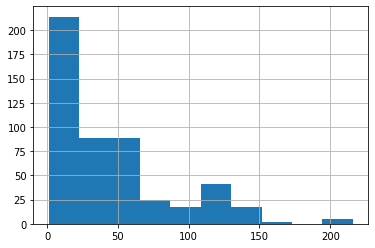

In [4]:
company_age_hist=df['Company Age (years)'].hist()
company_age_hist

<AxesSubplot:>

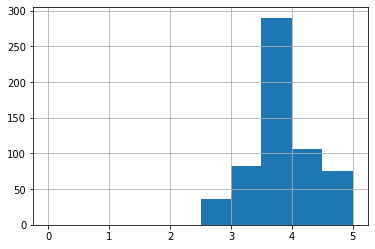

In [5]:
company_rating_hist=df['Rating'].hist(range=[0,5])
company_rating_hist

<AxesSubplot:>

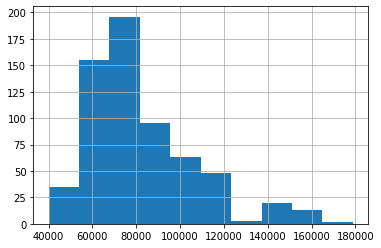

In [6]:
avg_salary_hist = df['Converted Salary'].hist()
avg_salary_hist

<AxesSubplot:>

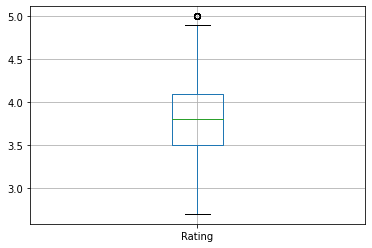

In [7]:
rating_boxplot = df.boxplot(column = 'Rating')
rating_boxplot

<AxesSubplot:>

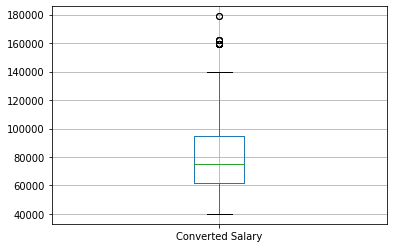

In [8]:
avg_salary_boxplot = df.boxplot(column = 'Converted Salary')
avg_salary_boxplot


<AxesSubplot:>

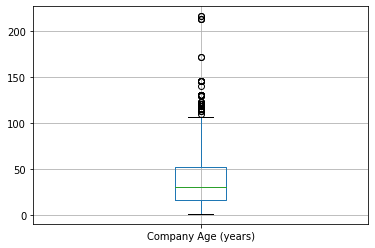

In [9]:
company_age_boxplot = df.boxplot(column = 'Company Age (years)')
company_age_boxplot

<AxesSubplot:>

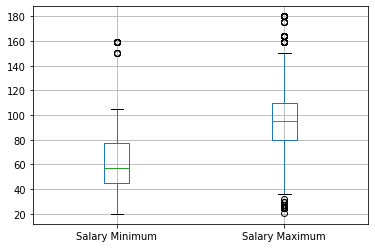

In [10]:
min_v_max_salary = df.boxplot(column = ['Salary Minimum', 'Salary Maximum'])
min_v_max_salary

This comparison tells us that the median salary minimum is in the upper $50k, the median salary maximum is in the mid $90k, and the bulk of the ranges are $50k-$80k for the minimum and $80k-110k for the maximum. It would be nice to include a median salary across all jobs to compare this field to all fields, but that will have to be at a different time. 

In [11]:
#Let's see if there are correlations between some continuous variables
df[['Company Age (years)', 'Rating', 'Converted Salary']].corr() # get positive/negative coorelation between all variables listed

,Company Age (years),Rating,Converted Salary
Company Age (years),1.000000,-0.080820,-0.137774
Rating,-0.080820,1.000000,0.098301
Converted Salary,-0.137774,0.098301,1.000000


<AxesSubplot:>

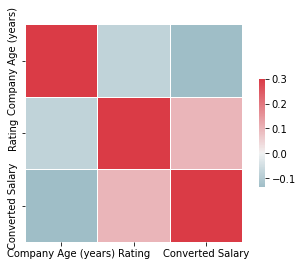

In [12]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Company Age (years)', 'Rating', 'Converted Salary']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True,linewidths=.5,cbar_kws={"shrink":.5})

Above, we see that there is a very slight positive coorelation between the rating of the company and the yearly salary of the company. The age of the company has a slight negative coorelation with yearly salary.

The bulk of the continuous data has now been analyzed, so lets take a look at the categorical data. Let's once again review our columns.

In [13]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

Scanning through the data, it would be useful to see how location data, such as City and State, as well as the size of the company coorelates with salary. In addition, we should compare salaries that were hourly to salaries that were yearly to see if they tend to be lower. We can also compare seniority levels, but I image that will clearly result in a higher salary for more seniority. The type of ownership and industry/sector should be looked at to see what sectors pay more. This could be useful information for someone who wants to specialize in a certain subfield of data analytics and is looking for the greatest return on investment. 

In [14]:
df_cats = df[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'City', 'State', 'Seniority Level']]

The total groupings for Size is 8


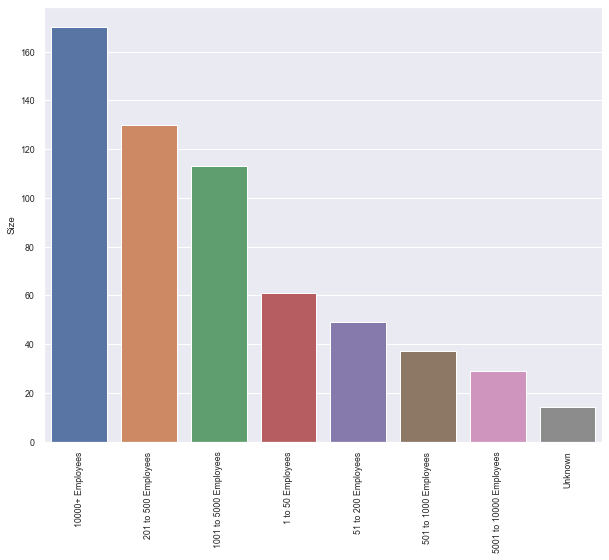

The total groupings for Type of ownership is 9


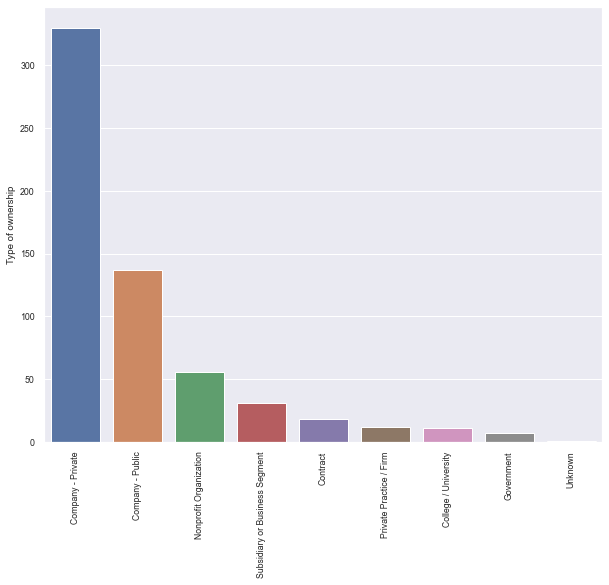

The total groupings for Industry is 37


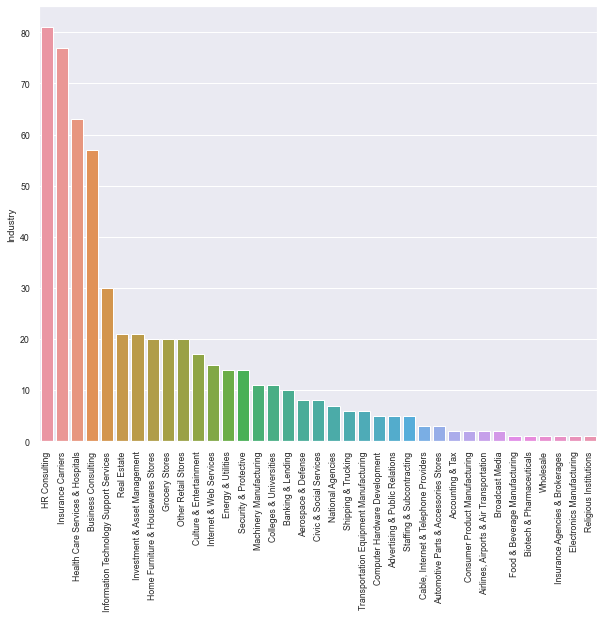

The total groupings for Sector is 19


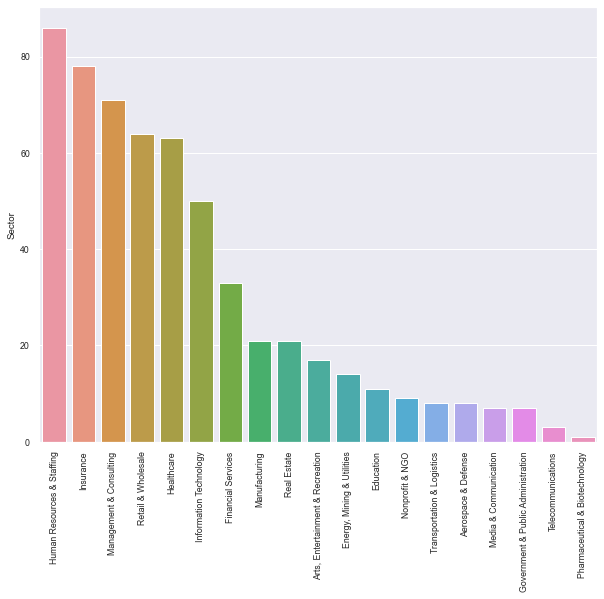

The total groupings for Revenue is 13


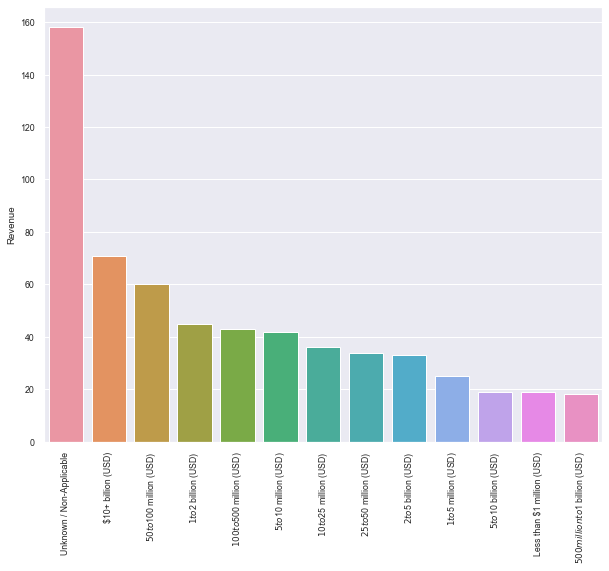

The total groupings for City is 69


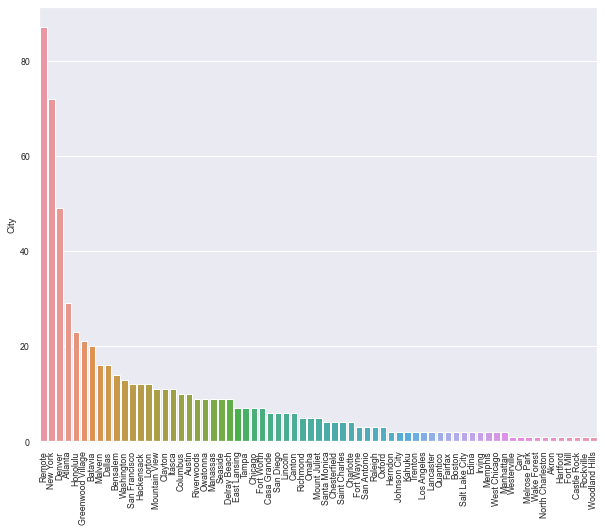

The total groupings for State is 28


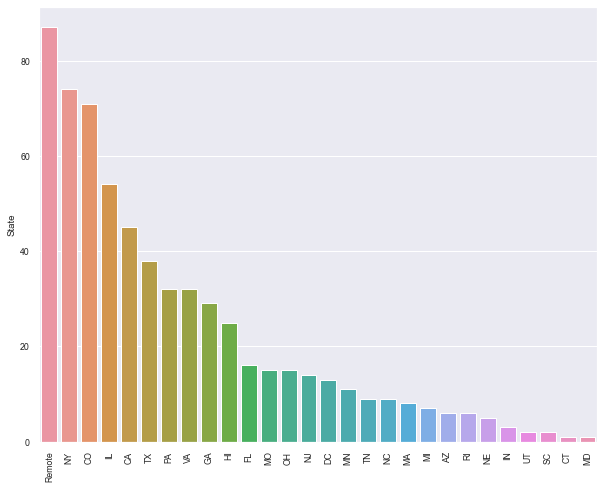

The total groupings for Seniority Level is 3


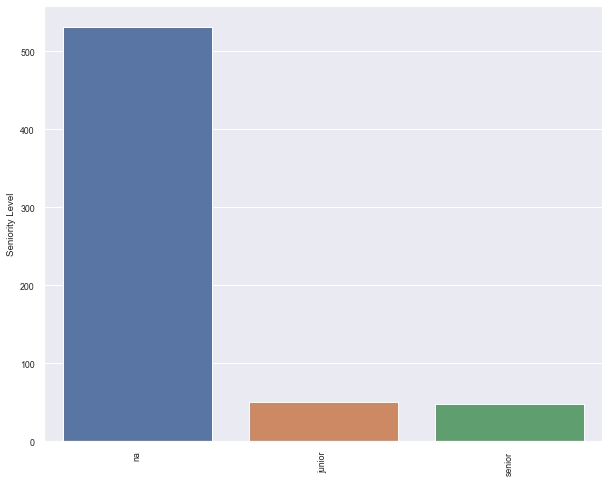

In [33]:
sns.set(rc={'figure.figsize':(10,8)},font_scale=0.8)
for i in df_cats.columns:
    cat_num = df_cats[i].value_counts()
    print("The total groupings for %s is %d" % (i, len(cat_num)))
    graph = sns.barplot(x=cat_num.index, y=cat_num, data=df_cats)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    #insert line to save strings here
    plt.show()
    

Let's walk through each graph and see if there are any stand out insights at a glance:
* **Size** - The largest company bin (10000+ employeers) comprises the bulk of the postings, followed by small enterprises (200-500 employees)
* **Ownership** - Private and publicly held companies have the highest postings for data analysts. Surprisingly, government and university jobs dont have very many postings. For universities this is especially surprising, as there are ample opportunities to look at large data sets to determine student success or happiness. 
* **Industry** - Human Resources, Insurance, Healthcare and Business consulting top the list for industries with data analyst job postings on Glassdoor. Surprisingly, biotech is at the low end of the list. Maybe this is due to data analytics being lumped in with the duties of a research scientist. One thing to note is the **broad** range of industries needing data analyst services. Even in this small sample set, **37** different represented industries are observed!
* **Revenue** The Revenue ranges given are roughly equivalent to each other in terms of representation. A good portion of the postings did not have an annual revenue, so perhaps supplimenting this data with a seperate datasource would be helpful if we wish to analyze based off revenue further. 
* **Location - city** - Large cities hold the most postings for data analysts, with New York topping the list. Surprisingly, remote jobs are the largest posting type! Good for people who have the skills but don't wish to change locations. 
* **Location - state** - Again, the bulk of locations are remote, with New York state holding the most postings after that. I was surprised to see California and Washington not represented more heavily, but perhaps those postings were listed as remote since they have more experience with that work being farmed out. A question to follow up with later. 
* **Seniority level** - Junior and senior positions based on text scraping are equally represented, but I need to go back and tweek the code to strip out I/II/III from the data and bin them into the appropriate seniority levels. As it stands, I won't be able to get very much out of this. 

In [34]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

In [35]:
pd.pivot_table(df, index = 'Title Grouping')

,Average Hourly Rate,Company Age (years),Converted Salary,Founded,Rating,Salary Average,Salary Maximum,Salary Minimum
Title Grouping,,,,,,,,
Unbinned,0.000000,16.000000,75000.000000,2006.000000,4.900000,75000.000000,90.000000,60.000000
analyst,0.124402,44.084677,81561.795853,1977.915323,3.806985,72340.622057,94.601324,62.240877
specialist,0.000000,46.000000,59873.000000,1976.000000,3.500000,59873.000000,81.000000,44.000000


In [39]:
df["Job Title"].value_counts().head(30)

Data Analyst                                                    150
Jr. Data Analyst                                                 30
Data Analyst I                                                   27
IT Data Analyst                                                  22
Data Analyst - Merchandising (Remote)                            20
Data Analyst (remote)                                            20
Cybersecurity Analyst II (Remote)                                20
Data Analyst (focus on PowerBI and DAX)                          18
Senior Data Analyst                                              15
Remote Data Manipulation Analyst                                 14
Junior Data Analyst                                              14
Strategy and Data Analyst, Sustainability                        12
Data and Systems Analyst                                         12
Data Analyst ($20 - $25/hour)                                    11
Administrative Assistant / Data Analyst Supporti

In [51]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ["Job Title", "Seniority Level"], values = 'Converted Salary')

,,Converted Salary
Job Title,Seniority Level,
528729 - Confidential Investigator/Data Analyst,na,57500.000000
Administrative Assistant / Data Analyst Supporting the USPIS,na,54080.000000
"Analyst, Product Research, Telematics & Mobility Data Products",na,81200.000000
Assistant Business and Data Analyst,na,75736.000000
BI Data Analyst,na,125000.000000
Business Analyst,na,102010.000000
Business Analyst (100% Remote),na,178880.000000
Business Analyst I,na,57805.000000
Business Analyst II - Remote,na,75810.000000


At this time, I need to go back through and rebinn the titles, including Entry-level = junior, Master = senior, etc. 

Let's take a look at the average salaries by State/City for these roles. I would hypothesize the costal states/cities would have the larger average salaries, but that will be affected by the types of jobs being posted in each state.

In [54]:
pd.pivot_table(df, index = 'State', values = ['Converted Salary']).sort_values('Converted Salary', ascending = False)

,Converted Salary
State,
GA,125328.034483
CA,117510.022222
UT,107500.000000
MA,93841.750000
PA,87962.875000
CO,83613.295775
IL,82946.388889
Remote,80711.149425
HI,80015.720000


Surprisingly, Georgia tops the list of average salaries, with California close behind. Utah takes the third spot. Michigan, Maryland and Montana are all low on the list. Perhaps this is due to the types of jobs being offered in these states. Let's make a pivot table showing the job titles and how many of those jobs are being offered. 

In [60]:
pd.pivot_table(df, index = ['State', 'Job Title'], values = 'Converted Salary', aggfunc = 'count').sort_values('State', ascending = False)

Converted Salary
State  Job Title                                                           
VA     HRIS Applications & Data Analyst                                   2
       Data and Systems Analyst                                          12
       Data Analyst Supporting the FBI                                   11
       Data Analyst                                                       5
       Business Analyst                                                   2
UT     Senior Data Analyst (remote)                                       2
TX     Data Modelling Analyst                                            10
       Data Analyst                                                       5
       Data Analyst - Tarrant County                                      7
       Business Data Analyst - Onboarding                                 1
       Jr. Data Analyst                                                  10
       Junior Data Analyst                                                2
       Senior Data Analyst                                                3
TN     IT Interface Analyst (FT) Data Management                          2
       Data Analyst                                                       2
       Business Data Analyst II                                           5
SC     Mid-Level Staffing Analyst (Virtual)                               1
       Data Analyst ($28 - 32/hr)                                         1
Remote Data Analyst - Payment Reconciliation Focused                      1
       Analyst, Product Research, Telematics & Mobilit...                 1
       Business Analyst                                                   1
       Business Analyst (100% Remote)                                     2
       Data Analyst                                                      18
       Data Analyst ($20 - $25/hour)                                     11
       Data Analyst (Business Intelligence)                               1
       Data Analyst (focus on PowerBI and DAX)                           18
       Data Analyst, Commercial Buildings and Integrat...                 8
       Jr. Data Analyst                                                  20
       Senior Associate (Data Science/Data Analytics/S...                 1
       Senior Data Analyst                                                1
       Senior Data Quality Analyst – Healthcare Claims...                 1
       Senior Marketing Data Analyst (100% Remote)                        2
       HR Data Analyst                                                    1
RI     Digital Data Analyst                                               6
PA     Remote Data Manipulation Analyst                                  14
       Data Analyst                                                      16
       Data & Statistical Analyst I                                       2
OH     Data Analyst                                                      11
       Business Analyst I                                                 3
       Provider Network, Data Analyst                                     1
NY     Data Analyst - Merchandising (Remote)                             20
       Administrative Assistant / Data Analyst Support...                11
       Assistant Business and Data Analyst                                8
       Data Analyst                                                      16
       528729 - Confidential Investigator/Data Analyst                    2
       Data Analyst II                                                    3
       Data Analyst needed! Start ASAP!                                   8
       Senior Data Analyst                                                4
       Sustainability Data Analyst                                        2
NJ     Junior Data Analyst                                               12
       Health Data Specialist II/Data Analyst                             2
NE     Statistical Data Analyst

This gives us some insights. Utah is only hiring two jobs, both at senior pay levels. Georgia is hiring a large amount of cybersecurity data analysts. Meanwhile, Michigan, Montana and Maryland are largely hiring junior positions. This does give us some insights, such as senior level and cybersecurity analysts potentially earning more than general analysts. 

Let's go ahead and loop through all the data in a pivot table to see if anything stands out.

In [61]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

In [78]:
df_pivots=df[['Job Title','Salary Minimum','Salary Maximum','Salary Average','Rating','Company Name','Location','Size','Founded','Type of ownership','Industry','Sector','Revenue','Average Hourly Rate', 'City', 'State','Company Age (years)','Title Grouping','Seniority Level','Converted Salary']]
pd.set_option('display.max_rows', None)
for i in df_pivots.columns:
    print(i) # get the column name
    if i == 'Converted Salary':
        pass
    else:
        table = pd.pivot_table(df_pivots, index = i, values='Converted Salary').sort_values('Converted Salary', ascending = False)
        print(table)

Job Title
                                                    Converted Salary
Job Title                                                           
Business Analyst (100% Remote)                         178880.000000
Data Analyst (SQL)                                     159100.000000
Cybersecurity Analyst II (Remote)                      140000.000000
BI Data Analyst                                        125000.000000
Senior Data Analyst                                    116648.933333
Strategy and Data Analyst, Sustainability              113854.000000
Remote Data Manipulation Analyst                       110000.000000
Senior Data Analyst (remote)                           107500.000000
Business Analyst                                       102010.000000
Principal Data Analyst                                 101356.000000
Senior Marketing Data Analyst (100% Remote)            100000.000000
Sr Data Analyst                                         99848.000000
Health Program Analyst I

A ton of quick insights from this pivot table dump. Unsurprisingly, senior analysts make significantly more than juniors ($102k vs $69k average). Business/Cybersecurity analysts top the list of salary ranges. Smaller companies (defined as 1-200, 500-5000 employees) pay on the lower end of salaries, with 200-500 employee companies being the outlier at the higher end. It would be interesting to see if 200-500 employee companies are requesting more senior/cybersecurity jobs, which skew the average up. Public companies and government jobs pay the highst on average, with university/non-provig being the lowest. Security and HR are on the higher end as well, with biotech, grocery and universities being the bototm. Lastly, the Real Estate, IT and Government sectors are the high end of salaries.

The data bins could us esome work, specifically the title grouping. It would also be nice to have a large dataset to take care of data skewing (such as having states with 1 high job posting skewing results). I could clean the data further by removing states with a single job count ooff the lst. For now, this will work as a launchpad to make some quick ML models for correlation predictions. 